<a href="https://colab.research.google.com/github/PuteriRaifeeza/Projects/blob/main/Hotel_Booking_Cancellation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking Cancellation Prediction**

📑**Context**:

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

📝 **Content**:

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

💾 **Data Dictionary**:

These features are typical in a dataset related to hotel bookings. Here's a brief description of each feature:

1. **hotel**: Type of hotel (e.g., Resort Hotel or City Hotel).
2. **is_canceled**: Indicates if the booking was canceled (1) or not (0).
3. **lead_time**: Number of days between the booking date and the arrival date.
4. **arrival_date_year**: Year of arrival date.
5. **arrival_date_month**: Month of arrival date.
6. **arrival_date_week_number**: Week number of arrival date.
7. **arrival_date_day_of_month**: Day of arrival date.
8. **stays_in_weekend_nights**: Number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay.
9. **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay.
10. **adults**: Number of adults.
11. **children**: Number of children.
12. **babies**: Number of babies.
13. **meal**: Type of meal booked (e.g., BB – Bed & Breakfast, HB – Half board, FB – Full board).
14. **country**: Country of origin of the guest.
15. **market_segment**: Market segment designation (e.g., Direct, Corporate, Online TA).
16. **distribution_channel**: Booking distribution channel (e.g., Direct, Corporate, TA/TO).
17. **is_repeated_guest**: Indicates if the booking was from a repeated guest (1) or not (0).
18. **previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking.
19. **previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking.
20. **reserved_room_type**: Code of the room type reserved.
21. **assigned_room_type**: Code of the room type assigned to the booking.
22. **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was registered until the moment of check-in or cancellation.
23. **deposit_type**: Type of deposit made for the booking (e.g., No Deposit, Non Refundable, Refundable).
24. **agent**: ID of the travel agency that made the booking.
25. **company**: ID of the company/entity that made the booking or on whose behalf the booking was made.
26. **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer.
27. **customer_type**: Type of booking (e.g., Contract, Group, Transient).
28. **adr**: Average Daily Rate, calculated by dividing the sum of all lodging transactions by the number of staying nights.
29. **required_car_parking_spaces**: Number of car parking spaces required by the customer.
30. **total_of_special_requests**: Number of special requests made by the customer (e.g., twin bed or high floor).
31. **reservation_status**: Reservation status (e.g., Canceled, Check-Out, No-Show).
32. **reservation_status_date**: Date at which the last status was set.

These features help in analyzing booking patterns, customer behavior, and other important aspects related to hotel management and marketing.

# **🤖 Data Understanding**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [43]:
df = pd.read_csv('/content/hotel_bookings.csv')
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [44]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [46]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [47]:
#To check the values of company
df['company'].value_counts()

,count
company,
40.0,927
223.0,784
67.0,267
45.0,250
153.0,215
...,...
104.0,1
531.0,1
160.0,1


In [48]:
df['required_car_parking_spaces'].value_counts()

,count
required_car_parking_spaces,
0,111974
1,7383
2,28
3,3
8,2


In [49]:
df['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


In [50]:
df['total_of_special_requests'].value_counts()

,count
total_of_special_requests,
0,70318
1,33226
2,12969
3,2497
4,340
5,40


In [51]:
df['deposit_type'].value_counts()

,count
deposit_type,
No Deposit,104641
Non Refund,14587
Refundable,162


In [52]:
df['lead_time'].value_counts()

,count
lead_time,
0,6345
1,3460
2,2069
3,1816
4,1715
...,...
400,1
370,1
532,1


In [53]:
df['country'].value_counts()

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
DJI,1
BWA,1
HND,1


# **🤖 Data Wrangling**

In [54]:
#removing the missing value for country

df.dropna(subset=['country'], axis=0, inplace=True)
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [55]:
#calculate the missing value percentage for 'agent'

missing_percentage_agent = (df['agent'].isnull().sum() / len(df)) * 100
print("Percentage of missing values in 'agent': {:.2f}%".format(missing_percentage_agent))

Percentage of missing values in 'agent': 13.46%


In [56]:
#removing the missing value for 'agent'

df.dropna(subset=['agent'], axis=0, inplace=True)
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [57]:
#calculate the missing value percentage for 'company' before deciding to drop the column

missing_percentage_company = (df['company'].isnull().sum() / len(df)) * 100
print("Percentage of missing values in 'company': {:.2f}%".format(missing_percentage_company))

Percentage of missing values in 'company': 99.79%


In [58]:
#check if the 'company' column exists before attempting to drop it

if 'company' in df.columns:
    df.drop('company', axis=1, inplace=True)
    print("Column 'company' dropped successfully.")
else:
    print("Column 'company' not found in DataFrame.")

df.isnull().sum()

Column 'company' dropped successfully.


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [59]:
#replace the missing value using mean for 'children' column

df['children'].replace(np.nan, df['children'].mean(),inplace=True)
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [60]:
#checking for 0 value for adults, babies and children located at the same row,
#as it is impossible to have 0 type of guests and assigning it to new variable

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
32029,Resort Hotel,0,4,2017,January,2,14,0,1,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,G,0,No Deposit,168.0,0,Transient-Party,0.00,0,0,Check-Out,2017-01-15
40392,City Hotel,0,132,2015,July,30,23,2,5,0,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,4,No Deposit,1.0,0,Transient-Party,0.00,0,0,Check-Out,2015-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114583,City Hotel,0,26,2017,June,25,19,1,4,0,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,D,K,2,No Deposit,9.0,0,Transient,90.00,0,1,Check-Out,2017-06-24
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [61]:
#calling for dataset without the 0 values for those 3 categories

df = df[~filter]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [62]:
#recheck to confirm that all data types are appropriately set for subsequent analysis and modeling.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102776 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102776 non-null  object 
 1   is_canceled                     102776 non-null  int64  
 2   lead_time                       102776 non-null  int64  
 3   arrival_date_year               102776 non-null  int64  
 4   arrival_date_month              102776 non-null  object 
 5   arrival_date_week_number        102776 non-null  int64  
 6   arrival_date_day_of_month       102776 non-null  int64  
 7   stays_in_weekend_nights         102776 non-null  int64  
 8   stays_in_week_nights            102776 non-null  int64  
 9   adults                          102776 non-null  int64  
 10  children                        102776 non-null  float64
 11  babies                          102776 non-null  int64  
 12  meal                 

In [63]:
df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,102776,102776.000000,102776.000000,102776.000000,102776,102776.000000,102776.000000,102776.000000,102776.000000,102776.000000,102776.000000,102776.000000,102776,102776,102776,102776,102776.000000,102776.000000,102776.000000,102776,102776,102776.000000,102776,102776.000000,102776.000000,102776,102776.000000,102776.000000,102776.000000,102776,102776
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,174,7,5,NaN,NaN,NaN,8,10,NaN,3,NaN,NaN,4,NaN,NaN,NaN,3,923
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,71067,NaN,NaN,NaN,12667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77586,37525,55998,94466,NaN,NaN,NaN,73180,64482,NaN,90206,NaN,NaN,77665,NaN,NaN,NaN,62623,1425
mean,NaN,0.390685,111.807348,2016.156875,NaN,27.337589,15.787606,0.977757,2.589058,1.902146,0.111361,0.007706,NaN,NaN,NaN,NaN,0.013632,0.077246,0.024257,NaN,NaN,0.200319,NaN,86.584543,2.618656,NaN,104.782997,0.053067,0.605472,NaN,NaN
std,NaN,0.487906,107.687196,0.706172,NaN,13.275559,8.793927,1.001479,1.897994,0.486859,0.412201,0.097145,NaN,NaN,NaN,NaN,0.115956,0.758558,0.435189,NaN,NaN,0.619239,NaN,110.728963,18.797478,NaN,49.941544,0.225423,0.799359,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,26.000000,2016.000000,NaN,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,0.000000,NaN,73.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,79.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,0.000000,NaN,96.300000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,169.000000,2017.000000,NaN,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,0.000000,NaN,127.800000,0.000000,1.000000,NaN,NaN


# **🤖 Exploratory Data Analysis (EDA)**

In [64]:
# prompt: code histogram for x = 'lead_time', y = ['is_canceled']

#plt.figure(figsize=(12, 6))
#sns.histplot(data=df, x='is_canceled', hue='lead_time')
#plt.title('Distribution of Lead Time by Cancellation Status')
#plt.xlabel('Lead Time (Days)')
#plt.ylabel('Count')
#plt.show()

**Q1**❓ : **From where the most guests are coming?**

In [65]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,13806
1,GBR,8529
2,FRA,7904
3,DEU,5785
4,ESP,5674
...,...,...
157,NAM,1
158,SYC,1
159,MWI,1
160,CYM,1


In [66]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.


**Q2❓ : How much do guests pay for a room per night?**

In [67]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


Both hotels have **different room types** and **different meal arrangements**. **Seasonal factors** are also important, So the prices varies a lot.

In [68]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

The figure shows that the average price per room depends on its type and the standard deviation.


**Q3❓ : How does the price vary per night over the year?**

In [69]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [70]:
#check for average daily rate using mean value for resort hotel by the arrival date month

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,78.869888
1,August,180.996491
2,December,62.265084
3,February,56.223826
4,January,50.536094
5,July,150.435979
6,June,108.789994
7,March,58.543179
8,May,78.860362
9,November,50.228513


In [71]:
#check for average daily rate using mean value for city hotel by the arrival date month

city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,113.354159
1,August,121.277029
2,December,90.514583
3,February,89.361132
4,January,85.275565
5,July,117.812820
6,June,119.917528
7,March,92.116289
8,May,122.718850
9,November,89.521418


In [72]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,78.869888,113.354159
1,August,180.996491,121.277029
2,December,62.265084,90.514583
3,February,56.223826,89.361132
4,January,50.536094,85.275565
5,July,150.435979,117.812820
6,June,108.789994,119.917528
7,March,58.543179,92.116289
8,May,78.860362,122.718850
9,November,50.228513,89.521418


Now we observe here that **month column** is **not in order**, and if we visualize we will get improper conclusions.

So, first we have to provide right hierarchy to month column.

In [73]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

In [74]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [75]:
#sorting the mean price for each hotel under variable 'final_prices'

final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,50.536094,85.275565
1,February,56.223826,89.361132
2,March,58.543179,92.116289
3,April,78.869888,113.354159
4,May,78.860362,122.718850
5,June,108.789994,119.917528
6,July,150.435979,117.812820
7,August,180.996491,121.277029
8,September,95.241546,113.736356
9,October,64.320831,102.970301


In [76]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

This plot clearly shows that prices in the **Resort Hotel** are **much higher** during the **summer (August)** and prices of **city hotel varies less** and is **most expensive** during **Spring and Autumn (May & August)**.

**Q4❓: Which are the most busy months?**

In [77]:
#value counts using 'arrival_date_month' for data_city and data_resort
#under variable 'resort_guests' and 'city_guests' then merge into one column

resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1175,1813
1,February,1605,2421
2,March,1724,3554
3,April,1965,3640
4,May,2019,4010
5,June,1735,3960
6,July,2713,4405
7,August,2813,4840
8,September,1759,3823
9,October,1625,3917


In [78]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

From this table, we can conclude that **August** has the **most number of guests** for both resort-hotel & city-hotel

In [79]:
# Identify categorical and numerical features

categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['number']).columns

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')
Numerical Features: Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [80]:
df['hotel'].info()

<class 'pandas.core.series.Series'>
Index: 102776 entries, 3 to 119389
Series name: hotel
Non-Null Count   Dtype 
--------------   ----- 
102776 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [81]:
from sklearn.feature_selection import f_classif
import pandas as pd
import numpy as np

X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Convert categorical columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(data=X, columns = categorical_features) # Added the DataFrame X to the function call.

#Calculate F-scores and p-values
f_scores, p_values = f_classif(X_encoded, y)

# Get feature names from the encoded DataFrame
feature_names = X_encoded.columns  # Use columns of the encoded DataFrame

# Create a DataFrame to view the results
results = pd.DataFrame({
    'Feature': feature_names,
    'F-Score': f_scores,
    'P-Value': p_values
})

print(results)

                                 Feature      F-Score       P-Value
0                              lead_time  8556.179522  0.000000e+00
1                      arrival_date_year     2.204337  1.376261e-01
2               arrival_date_week_number     1.936760  1.640237e-01
3              arrival_date_day_of_month     3.008368  8.283863e-02
4                stays_in_weekend_nights    56.572376  5.460557e-14
...                                  ...          ...           ...
1169  reservation_status_date_2017-09-08     2.564859  1.092654e-01
1170  reservation_status_date_2017-09-09     3.847411  4.982555e-02
1171  reservation_status_date_2017-09-10     2.564859  1.092654e-01
1172  reservation_status_date_2017-09-12     0.641184  4.232843e-01
1173  reservation_status_date_2017-09-14     1.282388  2.574581e-01

[1174 rows x 3 columns]


We only chose the significant features from F value and P value for our targeted objectives. Hence, we will drop the useless columns below.

In [82]:
useless_col = ['arrival_date_month', 'meal', 'country',
        'reserved_room_type', 'assigned_room_type', 'reservation_status',
       'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr']

df.drop(useless_col, axis = 1, inplace = True)

In [83]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type']

In [84]:
#categorical columns
cat_df = df[cat_cols]
cat_df.head()

,hotel,market_segment,distribution_channel,deposit_type,customer_type
3,Resort Hotel,Corporate,Corporate,No Deposit,Transient
4,Resort Hotel,Online TA,TA/TO,No Deposit,Transient
5,Resort Hotel,Online TA,TA/TO,No Deposit,Transient
7,Resort Hotel,Direct,Direct,No Deposit,Transient
8,Resort Hotel,Online TA,TA/TO,No Deposit,Transient


In [85]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

market_segment: 
['Corporate' 'Online TA' 'Direct' 'Offline TA/TO' 'Groups' 'Complementary'
 'Aviation']

distribution_channel: 
['Corporate' 'TA/TO' 'Direct' 'Undefined' 'GDS']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']



In [86]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})
cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

In [87]:
cat_df.head()

,hotel,market_segment,distribution_channel,deposit_type,customer_type
3,0,1,1,0,0
4,0,2,2,0,0
5,0,2,2,0,0
7,0,0,0,0,0
8,0,2,2,0,0


In [88]:
df_numeric = df.drop(columns = cat_cols, axis = 1)
#df_numeric.drop('is_canceled', axis = 1, inplace = True)
df_numeric

,is_canceled,lead_time,is_repeated_guest,required_car_parking_spaces,total_of_special_requests
3,0,13,0,0,0
4,0,14,0,0,1
5,0,14,0,0,1
7,0,9,0,0,1
8,1,85,0,0,1
...,...,...,...,...,...
119385,0,23,0,0,0
119386,0,102,0,0,2
119387,0,34,0,0,4
119388,0,109,0,0,0


In [89]:
df_numeric.head(20)

,is_canceled,lead_time,is_repeated_guest,required_car_parking_spaces,total_of_special_requests
3,0,13,0,0,0
4,0,14,0,0,1
5,0,14,0,0,1
7,0,9,0,0,1
8,1,85,0,0,1
9,1,75,0,0,0
10,1,23,0,0,0
11,0,35,0,0,0
12,0,68,0,0,3
13,0,18,0,0,1


In [90]:
X = pd.concat([cat_df, df_numeric], axis = 1)
y = df['is_canceled']

### Combining categorical (after encoding) and numerical columns

In [91]:
df = pd.concat([cat_df, df_numeric], axis = 1)
df

,hotel,market_segment,distribution_channel,deposit_type,customer_type,is_canceled,lead_time,is_repeated_guest,required_car_parking_spaces,total_of_special_requests
3,0,1,1,0,0,0,13,0,0,0
4,0,2,2,0,0,0,14,0,0,1
5,0,2,2,0,0,0,14,0,0,1
7,0,0,0,0,0,0,9,0,0,1
8,0,2,2,0,0,1,85,0,0,1
...,...,...,...,...,...,...,...,...,...,...
119385,1,3,2,0,0,0,23,0,0,0
119386,1,2,2,0,0,0,102,0,0,2
119387,1,2,2,0,0,0,34,0,0,4
119388,1,2,2,0,0,0,109,0,0,0


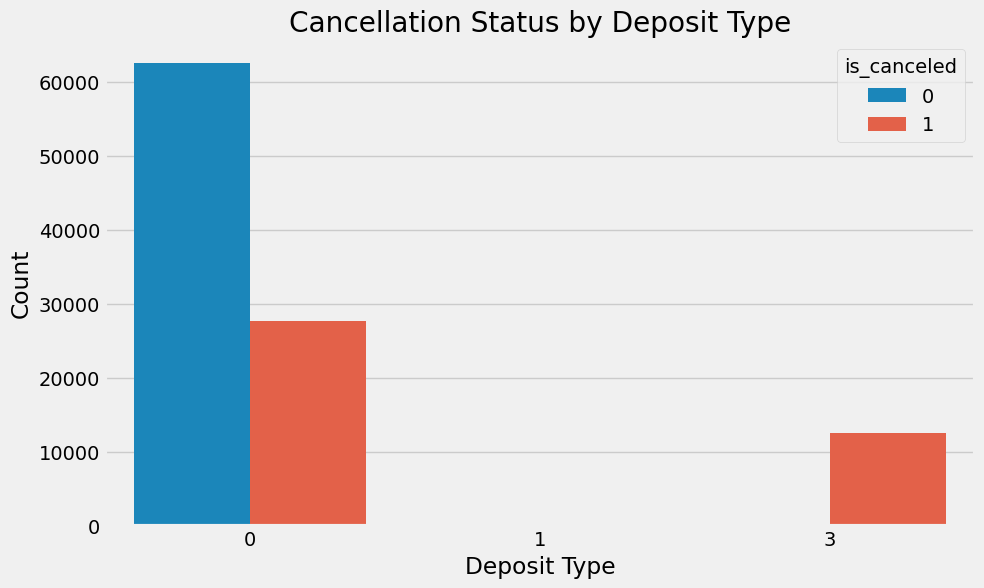

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.title('Cancellation Status by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.show()

In [93]:
#sns.pairplot(df_sales,hue="is_canceled",palette='husl')
#plt.show()

# **🤖 Modelling**

# We did comparison between five models. Since we got 100% accuracy for 4 models hence we did further evaluation using Cross Validation

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [95]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

**👾 K-Nearest Neighbors (KNN)**

In [96]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)*100
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)
print(f"Accuracy Score of KNN is : {acc_knn}")

Train Result:
Accuracy Score: 98.91%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.985145      0.995504  0.989116      0.990325      0.989193
recall         0.997171      0.976561  0.989116      0.986866      0.989116
f1-score       0.991121      0.985942  0.989116      0.988532      0.989097
support    43827.000000  28116.000000  0.989116  71943.000000  71943.000000
_______________________________________________
Confusion Matrix: 
 [[43703   124]
 [  659 27457]]

Test Result:
Accuracy Score: 98.07%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.974750      0.990399   0.98067      0.982574      0.980859
recall         0.994041      0.959791   0.98067      0.976916      0.980670
f1-score       0.984301      0.974854   0.98067      0.979578      0.980613
s

**🛠️ K-Nearest Neighbors Hyperparameter Tuning**

In [97]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_knn = grid_search.best_estimator_

y_pred_best_knn = best_knn.predict(X_test)

acc_best_knn = accuracy_score(y_test, y_pred_best_knn)
conf_best = confusion_matrix(y_test, y_pred_best_knn)
clf_report_best = classification_report(y_test, y_pred_best_knn)

print(f"Accuracy Score of best KNN is : {acc_best_knn}")
print(f"Confusion Matrix : \n{conf_best}")
print(f"Classification Report : \n{clf_report_best}")

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Accuracy Score of best KNN is : 0.9910809846592936
Confusion Matrix : 
[[18759    37]
 [  238 11799]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18796
           1       1.00      0.98      0.99     12037

    accuracy                           0.99     30833
   macro avg       0.99      0.99      0.99     30833
weighted avg       0.99      0.99      0.99     30833



In [98]:
#train_score = []
#test_score = []
#neighbors = range(1, 30)

#for k in neighbors:
 #   model = KNeighborsClassifier(n_neighbors=k)
 #  model.fit(X_train, y_train)
  #  train_score.append(model.score(X_train, y_train))
   # test_score.append(model.score(X_test, y_test))

#plt.figure(figsize=(10, 7))

#plt.plot(neighbors, train_score, label="Train score")
#plt.plot(neighbors, test_score, label="Test score")
#plt.xticks(np.arange(1, 21, 1))
#plt.xlabel("Number of neighbors")
#plt.ylabel("Model score")
#plt.legend()

#print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

**👾 XGBoost**

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)*100
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)
print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")

**Cross Validation for XGBoost**

In [100]:
#cross validation xgboost
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X, y, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0


**XGBoost Hyperparameter Tuning**

##### We did further evaluation for XGBoost because after Cross Validation, we still get 100% accuracy. Hence, we want to check whether is it overfitting or not.

In [101]:
!pip install scipy scikit-learn xgboost
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': stats.randint(100, 1000),  # Number of trees
    'max_depth': stats.randint(3, 10),         # Maximum depth of each tree
    'learning_rate': stats.uniform(0.01, 0.3),  # Step size shrinkage
    'subsample': stats.uniform(0.6, 0.4),       # Fraction of samples used for each tree
    'colsample_bytree': stats.uniform(0.6, 0.4), # Fraction of features used for each tree
    'gamma': stats.uniform(0, 10)               # Minimum loss reduction required to split a node
}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False)

# Create a RandomizedSearchCV object for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter combinations to try
    cv=5,       # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric
    n_jobs=-1,   # Use all available cores
    verbose=2,   # Print progress
    random_state=42  # Set random seed for reproducibility
)

# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a new XGBoost model with the best hyperparameters
best_xgb_clf = XGBClassifier(**best_params, use_label_encoder=False)
best_xgb_clf.fit(X_train, y_train)

#
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        '''
        test performance
        '''
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Evaluate the model (assuming you have a 'print_score' function defined)
print_score(best_xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(best_xgb_clf, X_train, y_train, X_test, y_test, train=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

**👾Decision Tree (DT)**

In [102]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)*100
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print_score(dtc, X_train, y_train, X_test, y_test, train=True)
print_score(dtc, X_train, y_train, X_test, y_test, train=False)
print(f"Accuracy Score of Decision Tree is : {acc_dtc}")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    43827.0  28116.0       1.0    71943.0       71943.0
_______________________________________________
Confusion Matrix: 
 [[43827     0]
 [    0 28116]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    18796.0  12037.0       1.0    30833.0       30833.0
_______________________________________________
Confu

In [103]:
from sklearn.model_selection import cross_val_score

# Assuming 'dtc' is your trained DecisionTreeClassifier model
scores = cross_val_score(dtc, X, y, cv=3)  # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [1. 1. 1.]
Average cross-validation score: 1.0


👾 **Random Forest**

In [104]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)*100
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print_score(dtc, X_train, y_train, X_test, y_test, train=True)
print_score(dtc, X_train, y_train, X_test, y_test, train=False)
print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    43827.0  28116.0       1.0    71943.0       71943.0
_______________________________________________
Confusion Matrix: 
 [[43827     0]
 [    0 28116]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    18796.0  12037.0       1.0    30833.0       30833.0
_______________________________________________
Confu

In [105]:
# prompt: cross validation random forest

# Assuming 'rd_clf' is your trained RandomForestClassifier model
scores = cross_val_score(rd_clf, X, y, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0


**Logistic Regression**

In [106]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)*100
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print_score(dtc, X_train, y_train, X_test, y_test, train=True)
print_score(dtc, X_train, y_train, X_test, y_test, train=False)
print(f"Accuracy Score of Logistic Regression is : {acc_lr}")

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    43827.0  28116.0       1.0    71943.0       71943.0
_______________________________________________
Confusion Matrix: 
 [[43827     0]
 [    0 28116]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    18796.0  12037.0       1.0    30833.0       30833.0
_______________________________________________
Confu

In [107]:
# prompt: cross validation logistic regression

# Assuming 'lr' is your trained LogisticRegression model
scores = cross_val_score(lr, X, y, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.9999027 1.        1.        1.        1.       ]
Average cross-validation score: 0.9999805409612765


In [108]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'XgBoost'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_xgb]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,100.000000
2,Decision Tree Classifier,100.000000
3,Random Forest Classifier,100.000000
4,XgBoost,100.000000
1,KNN,98.067006


In [109]:
px.bar (data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison',category_orders = None )

#### In conclusion, after Cross Validation, we got 100% accuracy for 3 models which is XGBoost, Random Forest and Decision Tree. However, we only choose XGBoost for further evaluation using Hyperparameter Tuning as we believe  XGBoost can handle large datasets and complexity. After the hypertuning, the optimal parameter for XGBoost are:

*   Max Depth = 7
*   Learning rate = 0.23
*   N Estimator = 120
*   Training Accuracy = 100%
*   Testing Accuracy = 100%
*   Our Chosen Best Model = XGBoost







In [114]:
!pip install gradio
!pip install gradio==3.43.1

In [118]:
import gradio as gr
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Sample data (replace with your actual data loading)
data = pd.DataFrame({
    'hotel': ['Resort Hotel', 'City Hotel', 'Resort Hotel'],
    'deposit_type': ['No Deposit', 'Refundable', 'Non Refund'],
    'customer_type': ['Transient', 'Group', 'Transient'],
    'lead_time': [10, 25, 15],
    'total_of_special_requests': [1, 2, 0],
    'required_car_parking_spaces': [0, 1, 1],
    'market_segment': ['Online TA', 'Direct', 'Corporate'],
    'distribution_channel': ['Direct', 'TA/TO', 'Direct'],
    'is_repeated_guest': [0, 1, 0],
    'is_canceled': [0, 1, 0]  # Assuming this is your target variable
})

# Preprocessing
numeric_features = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 'is_repeated_guest']
categorical_features = ['hotel', 'deposit_type', 'customer_type', 'market_segment', 'distribution_channel']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model training (replace with your actual training process)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', XGBClassifier())])
model.fit(data.drop('is_canceled', axis=1), data['is_canceled'])

# Gradio interface
def predict_cancellation(hotel, deposit_type, customer_type, lead_time, total_of_special_requests,
                        required_car_parking_spaces, market_segment, distribution_channel, is_repeated_guest):
    input_data = pd.DataFrame({
        'hotel': [hotel],
        'deposit_type': [deposit_type],
        'customer_type': [customer_type],
        'lead_time': [lead_time],
        'total_of_special_requests': [total_of_special_requests],
        'required_car_parking_spaces': [required_car_parking_spaces],
        'market_segment': [market_segment],
        'distribution_channel': [distribution_channel],
        'is_repeated_guest': [is_repeated_guest]
    })
    prediction = model.predict(input_data)[0]
    return "Cancellation Likely" if prediction == 1 else "Cancellation Unlikely"

inputs = [
    gr.inputs.Dropdown(['Resort Hotel', 'City Hotel'], label="Hotel"),
    gr.inputs.Dropdown(['No Deposit', 'Refundable', 'Non Refund'], label="Deposit Type"),
    gr.inputs.Dropdown(['Transient', 'Contract', 'Transient-Party', 'Group'], label="Customer Type"),
    gr.inputs.Slider(minimum=0, maximum=463,label="Lead Time"),
    gr.inputs.Slider(minimum=0, maximum=5,label="Total Special Requests"),
    gr.inputs.Slider(minimum=0, maximum=3,label="Required Car Parking Spaces"),
    gr.inputs.Dropdown(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation'], label="Market Segment"),
    gr.inputs.Dropdown(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], label="Distribution Channel"),
    gr.inputs.Radio([0, 1], label="Is Repeated Guest")
]
output = gr.outputs.Label(label="Prediction")

gr.Interface(fn=predict_cancellation, inputs=inputs, outputs=output, title="Hotel Cancellation Prediction").launch(share=False)

IMPORTANT: You are using gradio version 3.43.1, however version 4.29.0 is available, please upgrade.
--------
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>